# Importing libraries

In [1]:
import pandas as pd
import sqlite3 as sqlite
import matplotlib.pyplot as plt
import seaborn as sns

# Database Connection

In [2]:
conn = sqlite.connect("travel.sqlite")
cursor = conn.cursor()

In [3]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
table_list = [table[0] for table in cursor.fetchall()]

In [4]:
print(f"List of tables\n---------------------------------------\n{table_list}")

List of tables
---------------------------------------
['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


# Data Exploration

In [5]:
aircrafts = pd.read_sql_query("SELECT * FROM aircrafts_data",conn)
airports = pd.read_sql_query("SELECT * FROM airports_data",conn)
boarding_pass = pd.read_sql_query("SELECT * FROM boarding_passes",conn)
bookings = pd.read_sql_query("SELECT * FROM bookings",conn)
flights = pd.read_sql_query("SELECT * FROM flights",conn)
seats = pd.read_sql_query("SELECT * FROM seats",conn)
ticket_flights = pd.read_sql_query("SELECT * FROM ticket_flights",conn)
tickets = pd.read_sql_query("SELECT * FROM tickets",conn)

In [6]:
aircrafts

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [7]:
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [8]:
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [9]:
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [10]:
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [15]:
for table in table_list:
    print(f"\ntable: {table}")
    column_info = conn.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [17]:
for table in table_list:
    print(f"\ntable: {table}")
    df_table = pd.read_sql_query(f"select * from {table}", conn)
    print(df_table.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis
The basic analysis of data provides insights into the number of planes with more than 100 seats, how the number of tickets booked & total amount earned over time, and the average fare for each aircraft with different fare conditions. These findings will be useful in developing strategies to increase occupancy rates and optimize pricing for each aircraft. 

### How many planes have more than 100 seats?

In [18]:
pd.read_sql_query("""SELECT aircraft_code, count(*) as number_seats FROM seats GROUP BY aircraft_code HAVING number_seats > 100;""",conn)

,aircraft_code,number_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


### How the number of tickets booked and total amount earned change with the time?
In order to gain a deeper understanding of the trend of ticket bookings and revenue earned through those bookings, we have utilized a line chart visualisation. Upon analysis of the chart, we observe that the number of tickets booked exhibits a gradual increase from June 22nd to July 7th, noticeable peak in ticket bookings where the highest number of tickets were booked on a single day. It is important to note that the revenue earned by the company from these bookings is closely tied to the number of tickets booked. Therefore, we can see a similar trend in the total revenue earned by the company throughout the analyzed time period. These findings suggest that further exploration of the factors  contributing to the peak in ticket bookings may be beneficial for increasing overall revenue and optimizing operational strategies.

In [22]:
tickets = pd.read_sql_query("""SELECT * FROM tickets INNER JOIN bookings ON tickets.book_ref = bookings.book_ref;""",conn)
tickets["book_date"] = pd.to_datetime(tickets["book_date"])
tickets["date"] = tickets["book_date"].dt.date

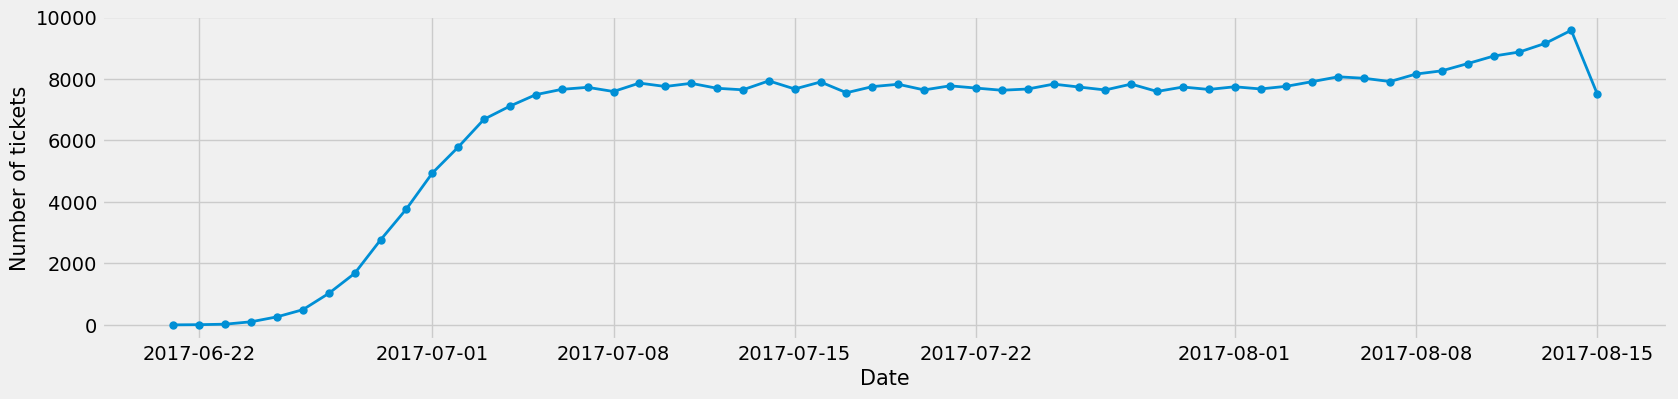

In [34]:
x = tickets.groupby("date")[["date"]].count()
plt.style.use("fivethirtyeight")
plt.figure(figsize = (18,4))
plt.plot(x.index, x["date"], marker=".", markersize=10, linewidth=2)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of tickets", fontsize=15)
plt.show()

In [39]:
bookings = pd.read_sql_query("""SELECT * FROM bookings""", conn)

bookings["book_date"] = pd.to_datetime(bookings["book_date"])
bookings["date"] = bookings["book_date"].dt.date
x = bookings.groupby("date")[["total_amount"]].sum()

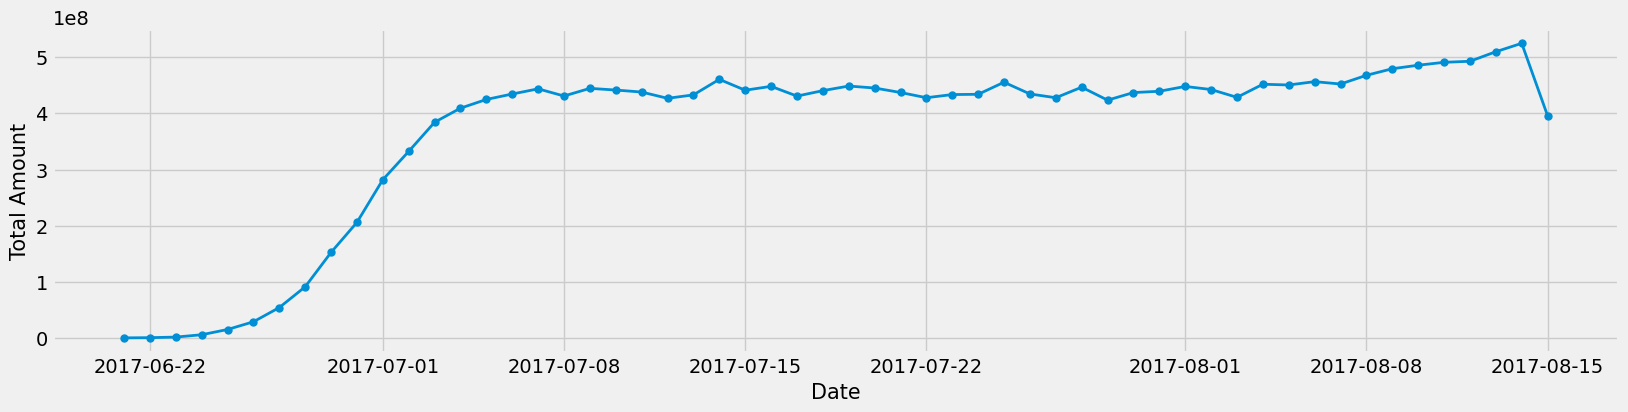

In [40]:
plt.figure(figsize = (18,4))
plt.plot(x.index, x["total_amount"], marker=".", markersize=10, linewidth=2)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Total Amount", fontsize=15)
plt.show()

### Calculate the average charges for each aircraft with different fare conditions.
We were able to generate a bar graph to graphically compare the data after we compelted the computations for the average costs associated with different fare conditions for each aircraft. The figure shows the data for three type of fares: business, economy & comfort. It is worth mentioning that the comfort class is available on only one aircraft, the 773. The CN1 & CR2 planes, on the other hand, only provide the economy class. When different pricing circumstances within each aircraft are compared, the charges for the business class are consistently greater than those for economy class. This trend may be seen across all planed, regardless of fare conditions.

In [46]:
df = pd.read_sql_query("""SELECT fare_conditions, aircraft_code, round(avg(amount),2) as avg_amount FROM ticket_flights JOIN flights on ticket_flights.flight_id = flights.flight_id GROUP BY aircraft_code, fare_conditions""",conn)


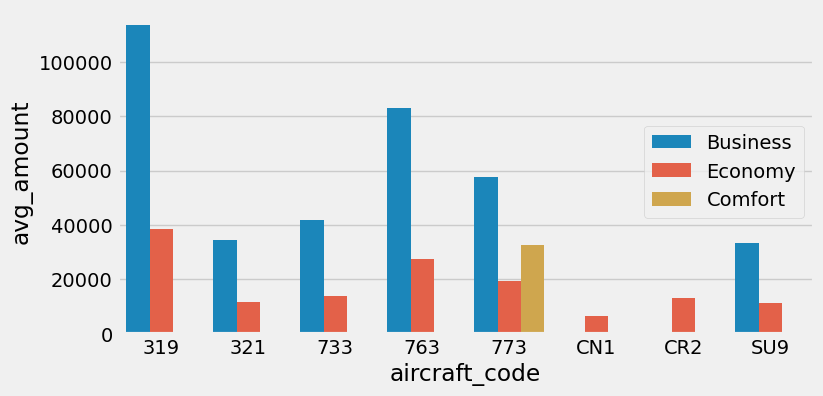

In [54]:
plt.figure(figsize=(8,4))
sns.barplot(data = df, x="aircraft_code", y="avg_amount", hue="fare_conditions")
plt.legend(loc="right")
plt.show()

# Analyzing Occupancy Rate
Airline must thoroughly analyze their revenue streams in order to maximize profitability. The overall income per year and average revenue per ticket for each aircraft are important metrics to consider. Airlines may use this information to determine which aircraft types &itineries geenrate the most income and alter their operations appropriately. This research can also assist in identifying potential for pricing optimization and allocating resources to more profitable routes. The below tables show the total revenue, total tickets and average revenue made per ticket for each aircraft. The aircraft with the highest total revenue is SU9 & it can be seen that the price of the business class & economy class is the lowest in this aircraft. This can be the reason that most of the people bought this aircraft ticket as its cost is less compared to others. The aircraft with least total revenue is CN1 and the possible reason behind this is it only offers economy class with very least price and it might be because of it's poor conditions or less facilities.

The average occupancy per aircraft is another critical number to consider. Airlines may measure how successfully they fill their seats and discover chances to boost occupancy rates by using this metric. High occupancy rate can help airlines increase & profitability while lowering operational expenses associated with vacant seats. Pricing strategy, airlines schedules, and customer satisfaction are all factors that might influence occupancy rates. The below table show the average booked seats from the total number of seats for each aircraft. The occupancy rate is calculated by dividing the booked seats by the total number of seats. Higher occupancy raet means the aircraft seats are more booked and only few are unbooked.

### For each aircraft, calculate the total revenue per year and the average revenue per ticket.

In [60]:
pd.read_sql_query("""select aircraft_code, ticket_count, total_revenue, total_revenue/ticket_count as avg_revenue_per_tkt from(SELECT aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue FROM ticket_flights JOIN 
flights ON ticket_flights.flight_id = flights.flight_id GROUP BY aircraft_code)""",conn)

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_tkt
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


### Calculate the average occupancy per aircraft.

In [70]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as 
occupancy_rate from (SELECT aircraft_code, flights.flight_id, count(*) as seats_count FROM boarding_passes INNER JOIN flights 
on boarding_passes.flight_id = flights.flight_id GROUP BY aircraft_code, flights.flight_id) as a INNER JOIN 
(SELECT aircraft_code, count(*) as num_seats from seats GROUP BY aircraft_code) as b on a.aircraft_code = b.aircraft_code 
GROUP BY  a.aircraft_code""",conn)


### Calculate by how much the total annual turnover could increase by giving all aircrafts a 10% higher occupancy rate 
Airline can assess how much their total yearly turnover could improve by providing all aircraft a 10% higher occupancy rate to further examine the possible benefits of raising occupancy rates. This research can assist airlines in determining the financial impact of boosting occupancy rates and if it is a realistic strategy. Airline may enhance occupancy rates and revenue while delivering greater value and service to customers by optimizing pricing tactics and other operational considerations. The below table shows how the total revenue increased after increasing the occupancy rate by 10% and it gives the result thatit will increase gradually so airlines should be more focused on the pricing strategy.

In [71]:
occupancy_rate["Inc Occupancy Rate"] = occupancy_rate["occupancy_rate"] + occupancy_rate["occupancy_rate"]*0.1

In [72]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc Occupancy Rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [74]:
total_revenue = pd.read_sql_query(""" SELECT aircraft_code, sum(amount) as total_revenue from ticket_flights join flights on flights.flight_id = ticket_flights.flight_id group by aircraft_code """,conn)

In [76]:
occupancy_rate["Inc Total Turnover"] = (total_revenue["total_revenue"]/occupancy_rate["occupancy_rate"])*occupancy_rate["Inc Occupancy Rate"]

In [78]:
pd.set_option("display.float_format",str)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc Occupancy Rate,Inc Total Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
